Matplotlib is building the font cache; this may take a moment.


Dimensões do dataset: (7043, 21)

Tipos de dados:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Valores ausentes:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0

C:\Users\tucka\AppData\Local\Temp\ipykernel_13012\4131907312.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
C:\Users\tucka\AppData\Local\Temp\ipykernel_13012\4131907312.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


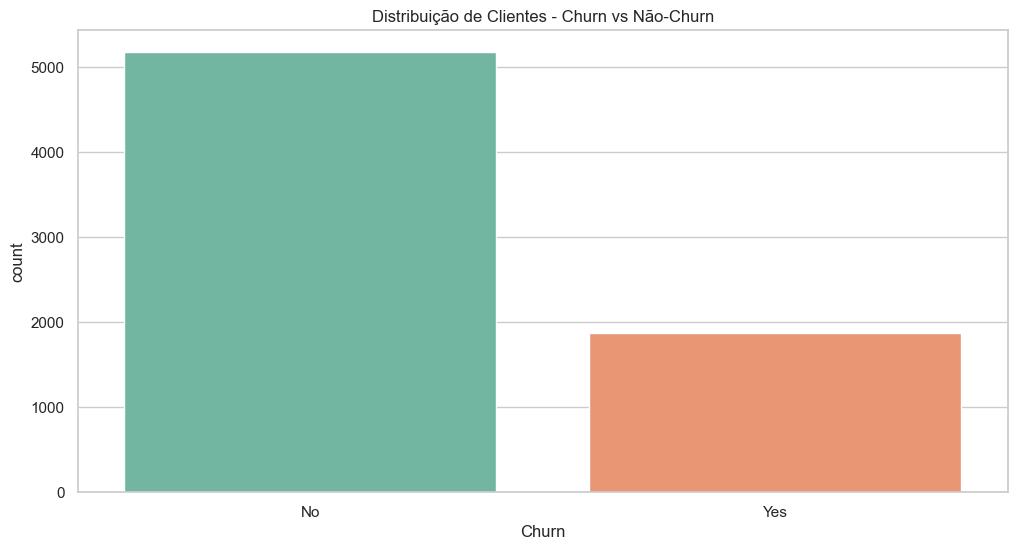


Percentual de Churn: 26.54 %


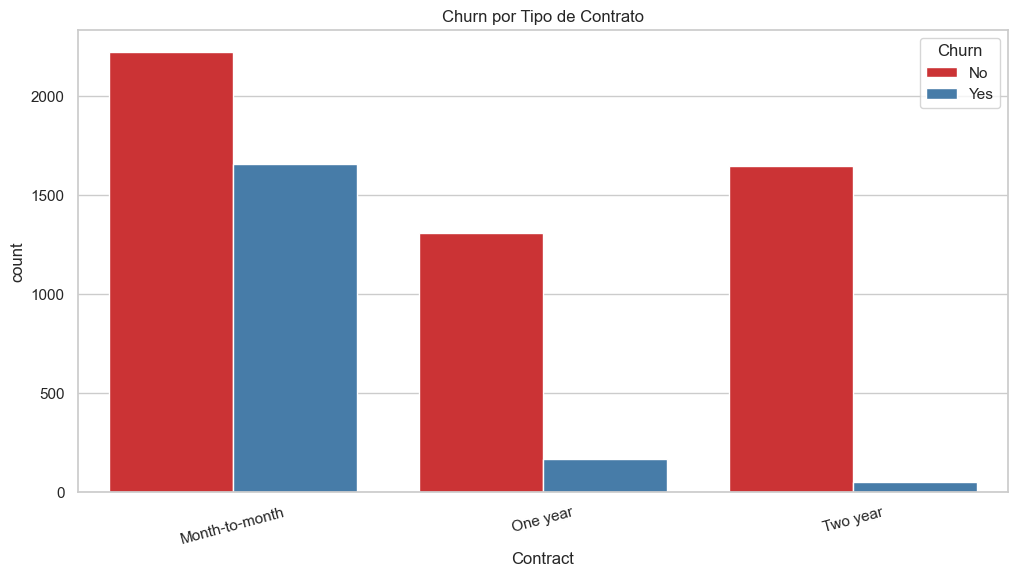

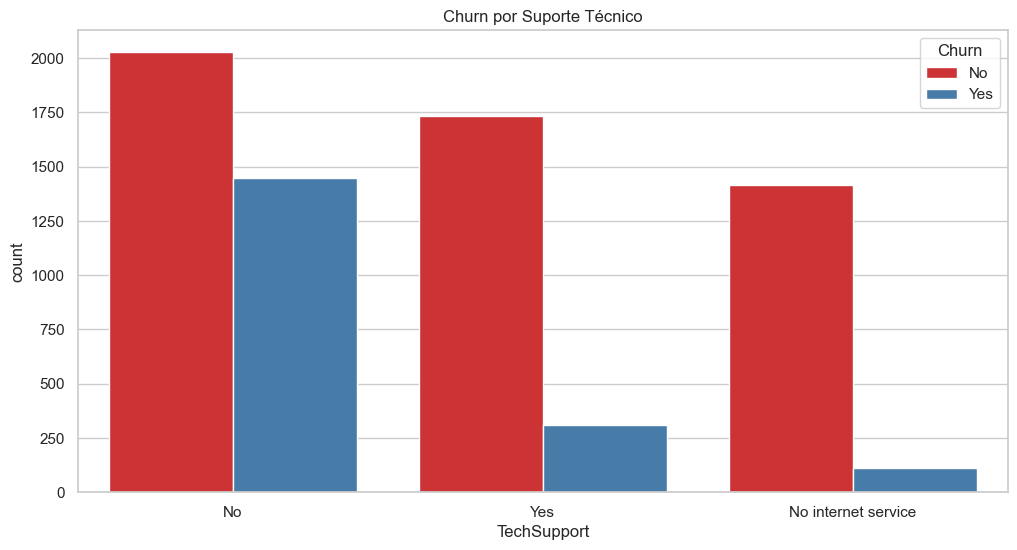

C:\Users\tucka\AppData\Local\Temp\ipykernel_13012\4131907312.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='TotalCharges', data=df, palette='Set3')


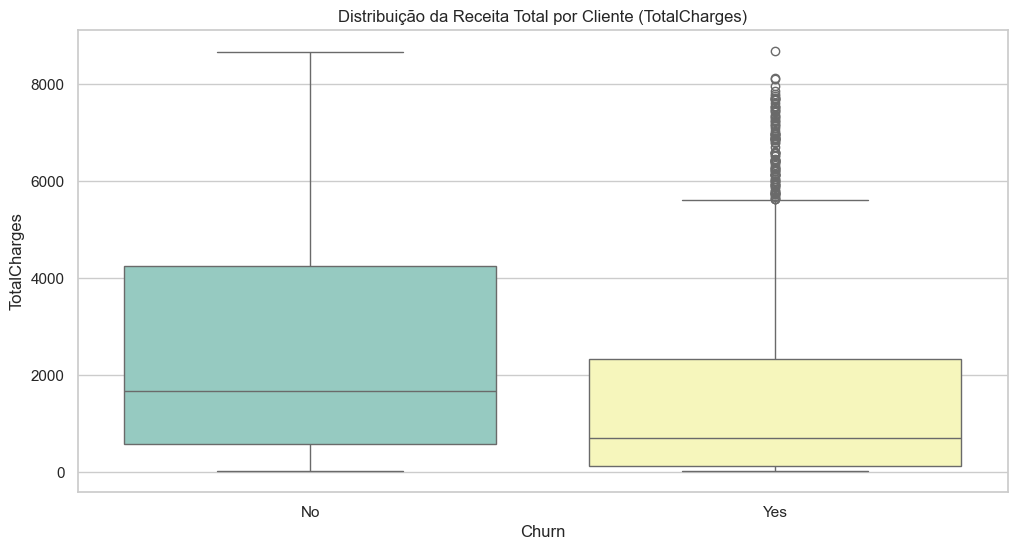

🔎 Conclusão: Clientes com contratos mensais têm maior churn. A presença de suporte técnico parece reduzir o churn.


In [3]:
# 📌 1. Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# 📌 2. Leitura dos dados
df = pd.read_csv('Telco-Customer-Churn.csv')  # renomeie conforme o nome do arquivo que baixar
df.head()

# 📌 3. Análise Inicial
print("Dimensões do dataset:", df.shape)
print("\nTipos de dados:")
print(df.dtypes)

print("\nValores ausentes:")
print(df.isnull().sum())

# Corrigir tipo TotalCharges (está como string em alguns casos)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# 📌 4. Distribuição geral do Churn
churn_counts = df['Churn'].value_counts()
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Distribuição de Clientes - Churn vs Não-Churn')
plt.show()

print("\nPercentual de Churn:", round(churn_counts['Yes'] / churn_counts.sum() * 100, 2), "%")

# 📌 5. Churn por tipo de contrato
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set1')
plt.title('Churn por Tipo de Contrato')
plt.xticks(rotation=15)
plt.show()

# 📌 6. Churn por suporte técnico
sns.countplot(x='TechSupport', hue='Churn', data=df, palette='Set1')
plt.title('Churn por Suporte Técnico')
plt.show()

# 📌 7. Boxplot - Carga Total por Churn
sns.boxplot(x='Churn', y='TotalCharges', data=df, palette='Set3')
plt.title('Distribuição da Receita Total por Cliente (TotalCharges)')
plt.show()

# 📌 8. Conclusões Iniciais
# (Você vai escrever aqui com base no que observar nos gráficos)

print("🔎 Conclusão: Clientes com contratos mensais têm maior churn. A presença de suporte técnico parece reduzir o churn.")
